In [3]:
import numpy as np # for complx mathematical operation
import pandas as pd  # for data frame manipulation
import matplotlib.pyplot as plt # for creating data visulization
import seaborn as sns #for creating data visulization
from ipywidgets import interact # for interactive analysis & also helps in interacting with python
#for splitting data
from sklearn.model_selection import train_test_split
import pickle

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("D:/PROJECTS/AGROWW/dataset/fertilizer.csv")

In [5]:
data.shape

(205, 9)

In [6]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      205 non-null    int64 
 1   Humidity         205 non-null    int64 
 2   Moisture         205 non-null    int64 
 3   Soil Type        205 non-null    object
 4   Crop Type        205 non-null    object
 5   Nitrogen         205 non-null    int64 
 6   Potassium        205 non-null    int64 
 7   Phosphorous      205 non-null    int64 
 8   Fertilizer Name  205 non-null    object
dtypes: int64(6), object(3)
memory usage: 14.5+ KB


In [8]:
data.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,30.204878,58.990244,43.590244,18.814634,3.219512,18.634146
std,3.592882,5.973791,11.236665,11.273115,5.571778,13.494654
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,27.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,42.000000,14.000000,0.000000,18.000000
75%,33.000000,64.000000,51.000000,24.000000,7.000000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [9]:
data.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [10]:
data.shape

(205, 9)

In [11]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [12]:
data.isnull().any()

Temparature        False
Humidity           False
Moisture           False
Soil Type          False
Crop Type          False
Nitrogen           False
Potassium          False
Phosphorous        False
Fertilizer Name    False
dtype: bool

In [13]:
#target Variable - Type of Fertilizer
fertilizers = data['Fertilizer Name'].unique()
print("Number of Fertilizers: ",len(fertilizers))
print("List of Fertilizers: ",fertilizers)

Number of Fertilizers:  7
List of Fertilizers:  ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


In [14]:
data["Fertilizer Name"].value_counts()

Fertilizer Name
Urea        44
DAP         38
28-28       36
20-20       30
14-35-14    29
17-17-17    18
10-26-26    10
Name: count, dtype: int64

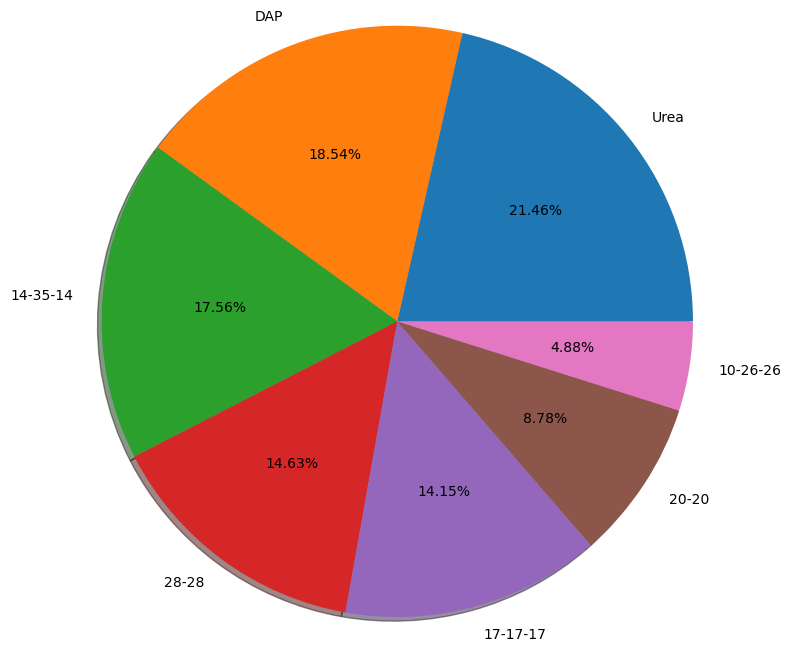

In [15]:
fig,ax=plt.subplots()
ax.pie(data['Fertilizer Name'].value_counts(),labels=list(data['Fertilizer Name'].unique()),radius=2,autopct="%1.2f%%",shadow=True)
plt.show()

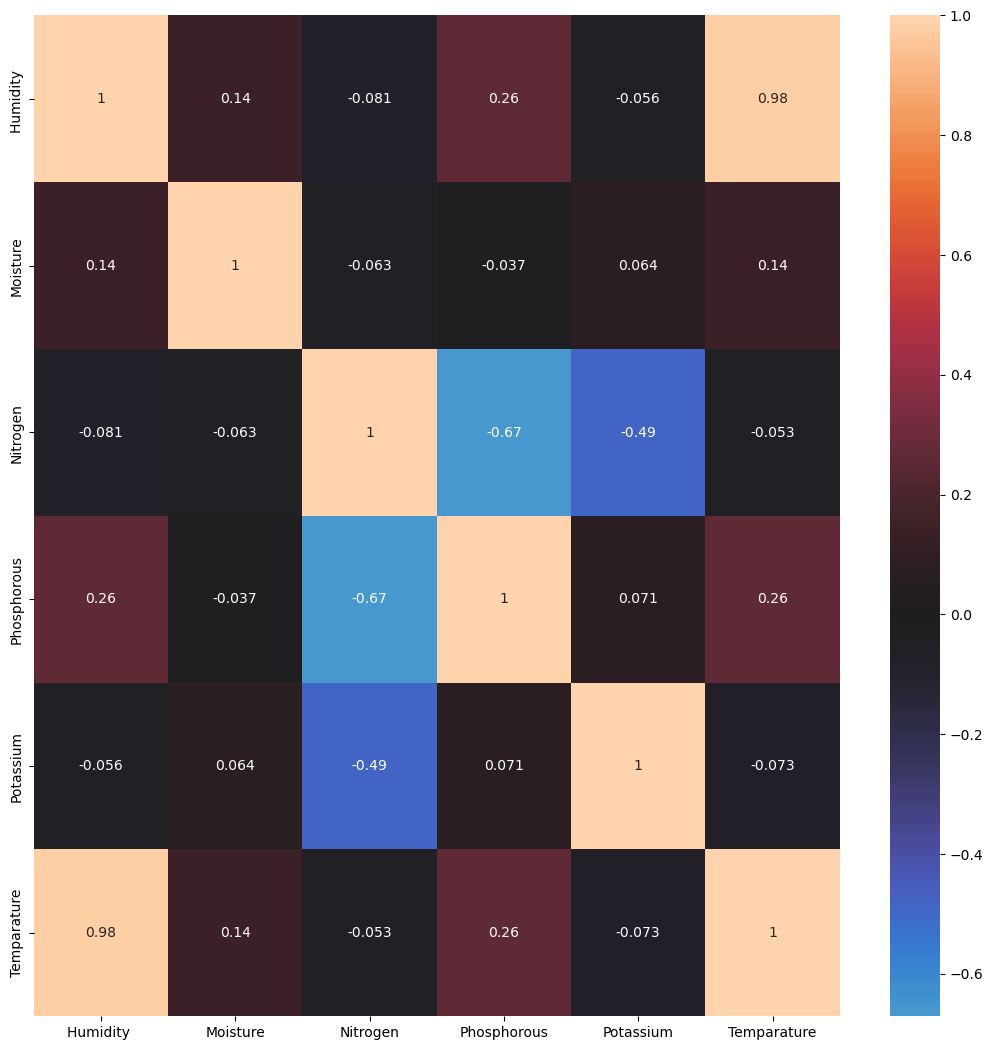

In [16]:
plt.figure(figsize=(13,13))
sns.heatmap(data[data.columns.difference(["Soil Type","Crop Type","Fertilizer Name"])].corr(),center=0,annot=True)
plt.show()



In [18]:
#PREPROCESSING

y = data['Fertilizer Name']
x = data[['Temparature','Humidity ','Moisture', 'Nitrogen', 'Potassium','Phosphorous']]  
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (205, 6)
Shape of y: (205,)


In [19]:
#Lets create Training and Testing Sets for validation of Results
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=10) # 80% Data will be alotted into trainins set & remaining 20% will be sent into testing set
print("The Shape of x train:", x_train.shape)
print("The Shape of x test:",x_test.shape)
print("The Shape of y train:",y_train.shape)
print("The Shape of y test",y_test.shape)




The Shape of x train: (143, 6)
The Shape of x test: (62, 6)
The Shape of y train: (143,)
The Shape of y test (62,)


In [20]:
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression from SKlearn to make our predective model


model = LogisticRegression(solver = 'liblinear') # Storing our Algorithm in varriable name model
model.fit(x_train, y_train) # Our model hase been trained from the data stored into training data set, Our model is fully trained now , further function used to predection
y_pred = model.predict(x_test) #  we predict our model for x_test data set and further stored it into y_pred variable
     

In [21]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         4
    14-35-14       1.00      1.00      1.00        10
    17-17-17       1.00      1.00      1.00         4
       20-20       1.00      1.00      1.00        12
       28-28       1.00      1.00      1.00        10
         DAP       1.00      1.00      1.00         8
        Urea       1.00      1.00      1.00        14

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [22]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=0)

# Train the model
dt_model.fit(x_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(x_test)

# Evaluate the model
dt_accuracy = dt_model.score(x_test, y_test)
print(f'Decision Tree Accuracy: {dt_accuracy}')

Decision Tree Accuracy: 0.9838709677419355


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=0)

# Train the model
gb_model.fit(x_train, y_train)

# Make predictions
gb_y_pred = gb_model.predict(x_test)

# Evaluate the model
gb_accuracy = gb_model.score(x_test, y_test)
print(f'Gradient Boosting Accuracy: {gb_accuracy}')

Gradient Boosting Accuracy: 0.9838709677419355


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=10)  # You can choose other kernels like 'rbf', 'poly', etc.

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(x_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'SVM Model Accuracy: {svm_accuracy}')


SVM Model Accuracy: 0.9838709677419355


In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with a chosen number of neighbors (e.g., k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(x_train, y_train)

# Make predictions
knn_y_pred = knn_model.predict(x_test)

# Evaluate the model
knn_accuracy = knn_model.score(x_test, y_test)
print(f'KNN Model Accuracy: {knn_accuracy}')


KNN Model Accuracy: 0.967741935483871


In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the models
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(probability=True, random_state=10)  # Set probability=True for soft voting
dt_model = DecisionTreeClassifier(random_state=10)
gb_model = GradientBoostingClassifier(random_state=10)

# Train the models (assuming x_train, y_train are defined)
knn_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)

# Create an ensemble hybrid model with VotingClassifier
hybrid_model = VotingClassifier(
    estimators=[
        ('knn', knn_model),
        ('svm', svm_model),
        ('decision_tree', dt_model),
        ('gradient_boosting', gb_model)
    ],
    voting='soft'  # Use 'soft' voting for probability-based predictions
)

# Fit the ensemble model on the training data
hybrid_model.fit(x_train, y_train)

# Evaluate the ensemble model on the test data
hybrid_accuracy = hybrid_model.score(x_test, y_test)
print(f'Hybrid Ensemble Model Accuracy: {hybrid_accuracy}')

# Optional: Check individual model accuracies
models = ['KNN', 'SVM', 'Decision Tree', 'Gradient Boosting']
accuracies = [model.score(x_test, y_test) for model in [knn_model, svm_model, dt_model, gb_model]]

for m, acc in zip(models, accuracies):
    print(f'{m} Accuracy: {acc}')


Hybrid Ensemble Model Accuracy: 0.9838709677419355
KNN Accuracy: 0.967741935483871
SVM Accuracy: 0.9354838709677419
Decision Tree Accuracy: 0.9838709677419355
Gradient Boosting Accuracy: 0.9838709677419355


In [41]:
# Example input for prediction (modify values as needed)
input_data = np.array([[15, 0, 24, 5, 1, 11 ]])

# Make prediction using the hybrid model
prediction = hybrid_model.predict(input_data)

# Print the suggested fertilizer for the given conditions
print("The suggested fertilizer for the given conditions is:", prediction)

The suggested fertilizer for the given conditions is: ['20-20']


In [64]:
import pickle

# Assuming `hybrid_model` is trained and ready for saving
with open('hybrid_model_fertilizer.pkl', 'wb') as file:
    pickle.dump(hybrid_model, file)


In [66]:
# Load the model
with open('hybrid_model_fertilizer.pkl', 'rb') as file:
    loaded_hybrid_model = pickle.load(file)

# Example input for prediction
import numpy as np
input_data = np.array([[15, 0, 24, 5, 1, 11]])

# Make prediction using the loaded model
prediction = loaded_hybrid_model.predict(input_data)

# Print the suggested fertilizer for the given conditions
print("The suggested fertilizer for the given conditions is:", prediction)


The suggested fertilizer for the given conditions is: ['20-20']
